In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\Data Science projects\LoanPrediction\train.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Data Preprocessing

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
data.Gender=data.Gender.fillna('Male')

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data.Married=data.Married.fillna('Yes')

In [12]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data.Dependents = data.Dependents.fillna('0')

In [14]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
data.Self_Employed=data.Self_Employed.fillna('No')

In [16]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(360.0)

In [18]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [20]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [21]:
data.LoanAmount=data.LoanAmount.fillna(120)

In [22]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#Split the data into input and output

In [24]:
X=data.iloc[:,1:12].values
y=data.iloc[:,12]

In [25]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [26]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [27]:
#train and test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder = LabelEncoder()

In [32]:
for i in range(0,5):
    X_train[:,i]=labelencoder.fit_transform(X_train[:,i])
X_train[:,10]=labelencoder.fit_transform(X_train[:,10])

In [33]:
labelencoder_y = LabelEncoder()

In [34]:
y_train = labelencoder_y.fit_transform(y_train)

In [35]:
labelencoder_xt = LabelEncoder()

In [36]:
for i in range(0,5):
    X_test[:,i]=labelencoder_xt.fit_transform(X_test[:,i])
X_test[:,10]=labelencoder_xt.fit_transform(X_test[:,10])

In [37]:
y_test = labelencoder_y.fit_transform(y_test)

In [38]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [39]:
X_train

array([[1, 1, 0, ..., 360.0, 1.0, 1],
       [1, 0, 1, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 0.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [40]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
X_train=sc.fit_transform(X_train)

In [43]:
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.26983787,
         0.41790088, -0.05166631],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.26983787,
         0.41790088, -0.05166631],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.26983787,
        -2.39291191, -1.32007414],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.26983787,
         0.41790088, -0.05166631],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.26983787,
         0.41790088,  1.21674153],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.26983787,
         0.41790088, -0.05166631]])

In [44]:
X_test = sc.fit_transform(X_test)

In [45]:
X_test

array([[ 0.46671381, -1.25      , -0.64059361, ...,  0.28661682,
         0.3866946 , -0.03125   ],
       [-2.14264068, -1.25      , -0.64059361, ...,  0.28661682,
         0.3866946 , -0.03125   ],
       [ 0.46671381,  0.8       , -0.64059361, ...,  0.28661682,
         0.3866946 ,  1.25      ],
       ...,
       [ 0.46671381,  0.8       , -0.64059361, ...,  0.28661682,
         0.3866946 , -0.03125   ],
       [ 0.46671381,  0.8       ,  2.38990694, ..., -2.33124469,
        -2.58602011,  1.25      ],
       [ 0.46671381,  0.8       ,  0.36957324, ...,  0.28661682,
         0.3866946 ,  1.25      ]])

In [46]:
#PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2)

In [49]:
X_train=pca.fit_transform(X_train)

In [50]:
X_test=pca.fit_transform(X_test)

In [51]:
X_train

array([[-7.79672585e-02, -4.29236258e-01],
       [ 2.24234694e-01,  1.19904811e+00],
       [ 1.32038827e-01, -2.37374765e-01],
       [-1.68594071e+00,  1.09176943e+00],
       [ 7.96884096e-01, -7.17359723e-01],
       [ 3.56464475e-01, -5.63670293e-02],
       [ 1.68368757e+00, -7.01065176e-01],
       [-2.82779167e+00,  5.24376302e-01],
       [-4.82004594e-01,  6.60656758e-01],
       [-1.56828090e+00,  9.53473464e-01],
       [-2.76164172e+00,  1.25262200e+00],
       [ 6.30738606e-01, -3.13188759e-01],
       [-1.00302298e-01, -6.75692677e-01],
       [ 3.59780945e-02, -2.21834269e+00],
       [-1.63265596e+00,  1.44534079e+00],
       [-1.51238326e+00,  4.19498507e-01],
       [-1.50443300e+00,  4.68552102e-01],
       [-1.36578373e+00, -2.61635598e-02],
       [-1.58811942e-01,  2.70742848e+00],
       [-8.63839738e-01, -8.86416432e-01],
       [-3.20693451e-02, -5.64013380e-01],
       [ 1.99714183e+00,  1.39346174e+00],
       [ 2.27720265e+00,  3.16538403e+00],
       [-9.

In [52]:
#Classification
#logistic regression
#nearesr neighbhor
#SVM

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [54]:
lrclf = LogisticRegression(max_iter=100,random_state=0)

In [55]:
lrclf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
lrclf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
y_pred=lrclf.predict(X_test)

In [58]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [59]:
from sklearn import metrics

In [60]:
metrics.accuracy_score(y_test,y_pred)

0.7317073170731707

In [61]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [62]:
cm

array([[ 0, 33],
       [ 0, 90]], dtype=int64)

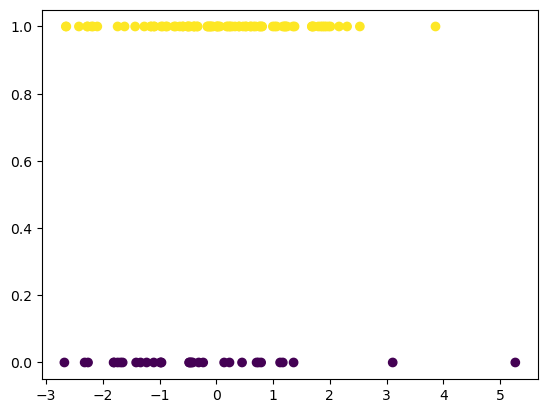

In [63]:
#observed data plot
plt.scatter(X_test[:,0],y_test,c=y_test)

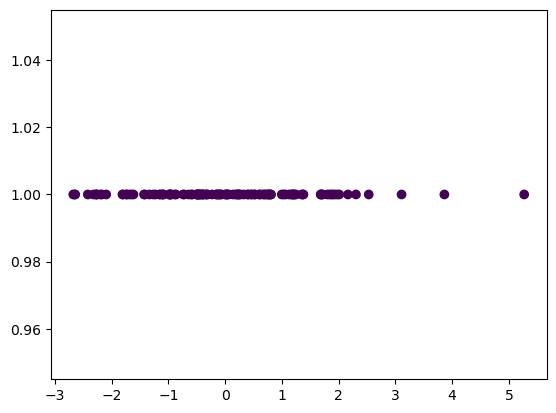

In [64]:
#predicted data plot
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [65]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knnclf=KNeighborsClassifier(n_neighbors=5)

In [67]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
knnclf.predict(X_test)

C:\Users\nmand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [69]:
y_pred=knnclf.predict(X_test)

C:\Users\nmand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


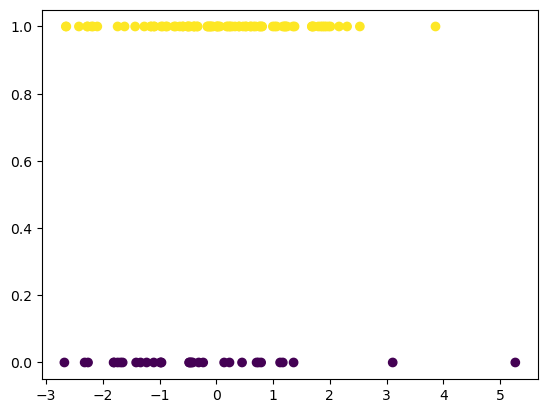

In [70]:
plt.scatter(X_test[:,0],y_test,c=y_test)

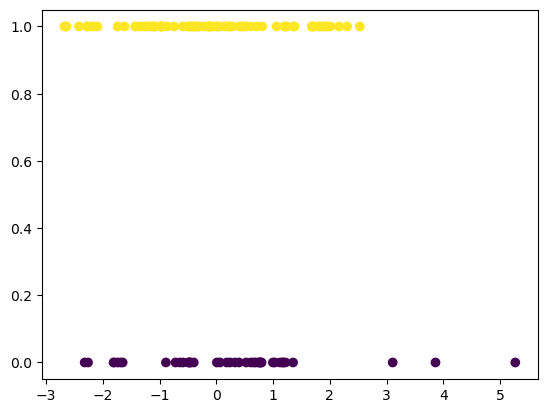

In [71]:
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [72]:
metrics.accuracy_score(y_test,y_pred)

0.6260162601626016

In [73]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [74]:
cm

array([[14, 19],
       [27, 63]], dtype=int64)

In [75]:
#Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [77]:
svcrbf=SVC(random_state=0)
svclin=SVC(random_state=0)

In [78]:
svcrbf.fit(X_train,y_train)
svclin.fit(X_train,y_train)

SVC(random_state=0)

In [79]:
y_predr=svcrbf.predict(X_test)
y_predl=svclin.predict(X_test)

In [80]:
#rbf svm
metrics.accuracy_score(y_test,y_predr)

0.7317073170731707

In [81]:
#lin svm
metrics.accuracy_score(y_test,y_predl)

0.7317073170731707